# Sustainable energy transitions data model

In [29]:
import pandas as pd, numpy as np, json, copy, zipfile, random, requests, StringIO

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from IPython.core.display import Image 
Image('favicon.png') 

## Country and region name converters

In [31]:
#country name converters

#EIA->pop
clist1={'North America':'Northern America',
'United States':'United States of America',
'Central & South America':'Latin America and the Caribbean',
'Bahamas, The':'Bahamas',
'Saint Vincent/Grenadines':'Saint Vincent and the Grenadines',
'Venezuela':'Venezuela (Bolivarian Republic of)',
'Macedonia':'The former Yugoslav Republic of Macedonia',
'Moldova':'Republic of Moldova',
'Russia':'Russian Federation',
'Iran':'Iran (Islamic Republic of)',
'Palestinian Territories':'State of Palestine',
'Syria':'Syrian Arab Republic',
'Yemen':'Yemen ',
'Congo (Brazzaville)':'Congo',
'Congo (Kinshasa)':'Democratic Republic of the Congo',
'Cote dIvoire (IvoryCoast)':"C\xc3\xb4te d'Ivoire",
'Gambia, The':'Gambia',
'Libya':'Libyan Arab Jamahiriya',
'Reunion':'R\xc3\xa9union',
'Somalia':'Somalia ',
'Sudan and South Sudan':'Sudan',
'Tanzania':'United Republic of Tanzania',
'Brunei':'Brunei Darussalam',
'Burma (Myanmar)':'Myanmar',
'Hong Kong':'China, Hong Kong Special Administrative Region',
'Korea, North':"Democratic People's Republic of Korea",
'Korea, South':'Republic of Korea',
'Laos':"Lao People's Democratic Republic",
'Macau':'China, Macao Special Administrative Region',
'Timor-Leste (East Timor)':'Timor-Leste',
'Virgin Islands,  U.S.':'United States Virgin Islands',
'Vietnam':'Viet Nam'}

#BP->pop
clist2={u'                 European Union #':u'Europe',
u'Rep. of Congo (Brazzaville)':u'Congo (Brazzaville)',
'Republic of Ireland':'Ireland',
'China Hong Kong SAR':'China, Hong Kong Special Administrative Region',
u'Total Africa':u'Africa',
u'Total North America':u'Northern America',
u'Total S. & Cent. America':'Latin America and the Caribbean',
u'Total World':u'World',
u'Total World ':u'World',
'South Korea':'Republic of Korea',
u'Trinidad & Tobago':u'Trinidad and Tobago',
u'US':u'United States of America'}

#WD->pop
clist3={u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'Congo, Rep.':u'Congo (Brazzaville)',
u'Caribbean small states':'Carribean',
u'East Asia & Pacific (all income levels)':'Eastern Asia',
u'Egypt, Arab Rep.':'Egypt',
u'European Union':u'Europe',
u'Hong Kong SAR, China':u'China, Hong Kong Special Administrative Region',
u'Iran, Islamic Rep.':u'Iran (Islamic Republic of)',
u'Kyrgyz Republic':u'Kyrgyzstan',
u'Korea, Rep.':u'Republic of Korea',
u'Latin America & Caribbean (all income levels)':'Latin America and the Caribbean',
u'Macedonia, FYR':u'The former Yugoslav Republic of Macedonia',
u'Korea, Dem. Rep.':u"Democratic People's Republic of Korea",
u'South Asia':u'Southern Asia',
u'Sub-Saharan Africa (all income levels)':u'Sub-Saharan Africa',
u'Slovak Republic':u'Slovakia',
u'Venezuela, RB':u'Venezuela (Bolivarian Republic of)',
u'Yemen, Rep.':u'Yemen ',
u'Congo, Dem. Rep.':u'Democratic Republic of the Congo'}

#COMTRADE->pop
clist4={u"Bosnia Herzegovina":"Bosnia and Herzegovina",
u'Central African Rep.':u'Central African Republic',
u'China, Hong Kong SAR':u'China, Hong Kong Special Administrative Region',
u'China, Macao SAR':u'China, Macao Special Administrative Region',
u'Czech Rep.':u'Czech Republic',
u"Dem. People's Rep. of Korea":"Democratic People's Republic of Korea",
u'Dem. Rep. of the Congo':"Democratic Republic of the Congo",
u'Dominican Rep.':u'Dominican Republic',
u'Fmr Arab Rep. of Yemen':u'Yemen ',
u'Fmr Ethiopia':u'Ethiopia',
u'Fmr Fed. Rep. of Germany':u'Germany',
u'Fmr Panama, excl.Canal Zone':u'Panama',
u'Fmr Rep. of Vietnam':u'Viet Nam',
u"Lao People's Dem. Rep.":u"Lao People's Democratic Republic",
u'Occ. Palestinian Terr.':u'State of Palestine',
u'Rep. of Korea':u'Republic of Korea',
u'Rep. of Moldova':u'Republic of Moldova',
u'Serbia and Montenegro':u'Serbia',
u'US Virgin Isds':u'United States Virgin Islands',
u'Solomon Isds':u'Solomon Islands',
u'United Rep. of Tanzania':u'United Republic of Tanzania',
u'TFYR of Macedonia':u'The former Yugoslav Republic of Macedonia',
u'USA':u'United States of America',
u'USA (before 1981)':u'United States of America',
}

#Jacobson->pop
clist5={u"Korea, Democratic People's Republic of":"Democratic People's Republic of Korea",
u'All countries':u'World',
u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'Iran, Islamic Republic of':u'Iran (Islamic Republic of)',
u'Macedonia, Former Yugoslav Republic of':u'The former Yugoslav Republic of Macedonia',
u'Congo, Democratic Republic of':u"Democratic Republic of the Congo",
u'Korea, Republic of':u'Republic of Korea',
u'Tanzania, United Republic of':u'United Republic of Tanzania',
u'Moldova, Republic of':u'Republic of Moldova',
u'Hong Kong, China':u'China, Hong Kong Special Administrative Region',
u'All countries.1':"World"
}

#NREL solar->pop
clist6={u"Antigua & Barbuda":u'Antigua and Barbuda',
u"Bosnia & Herzegovina":u"Bosnia and Herzegovina",
u"Brunei":u'Brunei Darussalam',
u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u"Iran":u'Iran (Islamic Republic of)',
u"Laos":u"Lao People's Democratic Republic",
u"Libya":'Libyan Arab Jamahiriya',
u"Moldova":u'Republic of Moldova',
u"North Korea":"Democratic People's Republic of Korea",
u"Reunion":'R\xc3\xa9union',
u'Sao Tome & Principe':u'Sao Tome and Principe',
u'Solomon Is.':u'Solomon Islands',
u'St. Lucia':u'Saint Lucia',
u'St. Vincent & the Grenadines':u'Saint Vincent and the Grenadines',
u'The Bahamas':u'Bahamas',
u'The Gambia':u'Gambia',
u'Virgin Is.':u'United States Virgin Islands',
u'West Bank':u'State of Palestine'
}

#NREL wind->pop
clist7={u"Antigua & Barbuda":u'Antigua and Barbuda',
u"Bosnia & Herzegovina":u"Bosnia and Herzegovina",
u'Occupied Palestinian Territory':u'State of Palestine',
u'China Macao SAR':u'China, Macao Special Administrative Region',
#"C\xc3\xb4te d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'East Timor':u'Timor-Leste',
u'TFYR Macedonia':u'The former Yugoslav Republic of Macedonia',
u'IAM-country Total':u'World'
}

#country entroids->pop
clist8={u'Burma':'Myanmar',
u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'Republic of the Congo':u'Congo (Brazzaville)',
u'Reunion':'R\xc3\xa9union'
}

def cnc(country):
    if country in clist1: return clist1[country]
    elif country in clist2: return clist2[country]
    elif country in clist3: return clist3[country]
    elif country in clist4: return clist4[country]
    elif country in clist5: return clist5[country]
    elif country in clist6: return clist6[country]
    elif country in clist7: return clist7[country]
    elif country in clist8: return clist8[country]
    else: return country

# Population

Consult the notebook entitled *pop.ipynb* for the details of mining the data from the UN statistics division online database.   
Due to being the reference database for country names cell, the cell below needs to be run first, before any other databases.

In [32]:
try:
    import zlib
    compression = zipfile.ZIP_DEFLATED
except:
    compression = zipfile.ZIP_STORED

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [33]:
#pop_path='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/
pop_path='E:/Dropbox/Public/datarepo/netset/db/'

In [34]:
#suppres warnings
import warnings
warnings.simplefilter(action = "ignore")

In [35]:
cc=pd.read_excel(pop_path+'Country Code and Name ISO2 ISO3.xls')
#http://unstats.un.org/unsd/tradekb/Attachment321.aspx?AttachmentType=1

In [36]:
ccs=cc['Country Code'].values

In [37]:
neighbors=pd.read_csv(pop_path+'contry-geotime.csv')
#https://raw.githubusercontent.com/ppKrauss/country-geotime/master/data/contry-geotime.csv

In [38]:
#country name converter from iso to comtrade and back
iso2c={}
isoc2={}
for i in cc.T.iteritems():
    iso2c[i[1][0]]=i[1][1]
    isoc2[i[1][1]]=i[1][0]

In [39]:
#country name converter from pop to iso
pop2iso={}
for i in cc.T.iteritems():
    pop2iso[cnc(i[1][1])]=int(i[1][0])

In [40]:
#country name converter from alpha 2 to iso
c2iso={}
for i in neighbors.T.iteritems():
    c2iso[str(i[1][0])]=i[1][1]
c2iso['NA']=c2iso['nan'] #adjust for namibia
c2iso.pop('nan');

In [41]:
#create country neighbor adjacency list based on iso country number codes
c2neighbors={}
for i in neighbors.T.iteritems():
    z=str(i[1][4]).split(' ')
    if (str(i[1][1])!='nan'): c2neighbors[int(i[1][1])]=[c2iso[k] for k in z if k!='nan']

In [42]:
#extend iso codes not yet encountered
iso2c[729]="Sudan"
iso2c[531]="Curacao"
iso2c[535]="Bonaire, Sint Eustatius and Saba"
iso2c[728]="South Sudan"
iso2c[534]="Sint Maarten (Dutch part)"
iso2c[652]="Saint Barthélemy"

In [ ]:
#load h2 min
h2=json.loads(file(pop_path+'h2.json','r').read())

In [ ]:
#load tradealpha d
#predata=json.loads(file(pop_path+'/trade/traded.json','r').read())
predata=json.loads(file(pop_path+'/trade/smalltrade.json','r').read())
tradealpha={}
for c in predata:
    tradealpha[c]={}
    for year in predata[c]:
        tradealpha[c][int(year)]=predata[c][year]
predata={}

In [ ]:
#load savedata
predata=json.loads(file(pop_path+'savedata6.json','r').read())
data={}
for c in predata:
    data[c]={}
    for year in predata[c]:
        data[c][int(year)]=predata[c][year]
predata={}

In [ ]:
#load grids
grid=json.loads(file(pop_path+'grid.json','r').read())
grid5=json.loads(file(pop_path+'grid5.json','r').read())
gridz=json.loads(file(pop_path+'gridz.json','r').read())
gridz5=json.loads(file(pop_path+'gridz5.json','r').read())

In [ ]:
#load ndists
ndists=json.loads(file(pop_path+'ndists.json','r').read())
distancenorm=7819.98

In [ ]:
#load goodcountries
#goodcountries=list(set(data.keys()).intersection(set(tradealpha.keys())))
goodcountries=json.loads(file(pop_path+'GC.json','r').read())
#goodcountries=goodcountries[:20] #dev
rgc={} #reverse goodcountries coder
for i in range(len(goodcountries)):
    rgc[goodcountries[i]]=i
cid={} #reverse goodcountries coder
for i in range(len(goodcountries)):
    cid[goodcountries[i]]=i

In [ ]:
def save3(sd,countrylist=[]):
#if True:
    print 'saving... ',sd,
    popsave={}
    countries=[]
    if countrylist==[]:
        c=sorted(goodcountries)
    else: c=countrylist
    for country in c:
        popdummy={}
        tosave=[]
        for year in data[country]:
            popdummy[year]=data[country][year]['population']
            for fuel in data[country][year]['energy']:
            #for fuel in allfuels:
                if fuel not in {'nrg','nrg_sum'}:
                    tosave.append({"t":year,"u":fuel,"g":"f","q1":"pp","q2":999,
                               "s":round(0 if (('navg3' in data[country][year]['energy'][fuel]['prod']) \
                                          and (np.isnan(data[country][year]['energy'][fuel]['prod']['navg3']))) else \
                               data[country][year]['energy'][fuel]['prod']['navg3'] if \
                                   'navg3' in data[country][year]['energy'][fuel]['prod'] else 0,3)
                               })
                    tosave.append({"t":year,"u":fuel,"g":"m","q1":"cc","q2":999,
                               "s":round(0 if (('navg3' in data[country][year]['energy'][fuel]['cons']) \
                                          and (np.isnan(data[country][year]['energy'][fuel]['cons']['navg3']))) else \
                               data[country][year]['energy'][fuel]['cons']['navg3'] if \
                                   'navg3' in data[country][year]['energy'][fuel]['cons'] else 0,3)
                              })
            
            #save balances - only for dev
            #if (year > min(balance.keys())):
            #    if year in balance:
            #        if country in balance[year]:
            #            tosave.append({"t":year,"u":"balance","g":"m","q1":"cc","q2":999,
            #                   "s":balance[year][country]})
        
        #no import export flows on global
        if country not in {"World"}:
            flowg={"Import":"f","Export":"m","Re-Export":"m","Re-Import":"f"}
            if country in tradealpha:
                for year in tradealpha[country]:
                    for fuel in tradealpha[country][year]:
                        for flow in tradealpha[country][year][fuel]:
                            for partner in tradealpha[country][year][fuel][flow]:
                                tosave.append({"t":int(float(year)),"u":fuel,"g":flowg[flow],"q1":flow,"q2":partner,
                                           "s":round(tradealpha[country][year][fuel][flow][partner],3)
                                           })
        
        popsave[country]=popdummy
        
        countries.append(country)
        file('../json/'+str(sd)+'/data.json','w').write(json.dumps(tosave)) 
        zf = zipfile.ZipFile('../json/'+str(sd)+'/'+str(country.encode('utf-8').replace('/','&&'))+'.zip', mode='w')
        zf.write('../json/'+str(sd)+'/data.json','data.json',compress_type=compression)
        zf.close()
        
    #save all countries list
    file('../json/countries.json','w').write(json.dumps(countries)) 
    
    #save countries populations
    #file('E:/Dropbox/Public/datarepo/Set/json/pop.json','w').write(json.dumps(popsave))     
    
    print ' done'

## Impex updating

In [ ]:
def updatenormimpex(reporter,partner,flow,value,weight=0.1):
    global nimportmatrix
    global nexportmatrix
    global nrimportmatrix
    global nrexportmatrix
    i=cid[reporter]
    j=cid[partner]
    if flow in {"Export","Re-Export"}:
        nexportmatrix[i][j]=(nexportmatrix[i][j]*(1-weight))+(value*weight)
        nrimportmatrix[j][i]=(nrimportmatrix[j][i]*(1-weight))+(value*weight)
    if flow in {"Import","Re-Import"}:
        nimportmatrix[i][j]=(nrimportmatrix[i][j]*(1-weight))+(value*weight)
        nrexportmatrix[j][i]=(nrexportmatrix[j][i]*(1-weight))+(value*weight)
    return

def influence(reporter,partner,selfinfluence=1.0,expfactor=3.0):
    #country trade influence will tend to have an exponential distribution, therefore we convert to linear 
    #with a strength of expfactor
    i=cid[reporter]
    j=cid[partner]
    if i==j: return selfinfluence
    else: return (12.0/36*nimportmatrix[i][j]\
        +6.0/36*nexportmatrix[j][i]\
        +4.0/36*nrimportmatrix[i][j]\
        +2.0/36*nrexportmatrix[j][i]\
        +6.0/36*nexportmatrix[i][j]\
        +3.0/36*nimportmatrix[j][i]\
        +2.0/36*nrexportmatrix[i][j]\
        +1.0/36*nrimportmatrix[j][i])**(1.0/expfactor)

def influenceimp(reporter,partner,selfinfluence=1.0,expfactor=3.0):
    #country trade influence will tend to have an exponential distribution, therefore we convert to linear 
    #with a strength of expfactor
    i=cid[reporter]
    j=cid[partner]
    if i==j: return selfinfluence
    else: return (18.0/36*nimportmatrix[i][j]\
        +9.0/36*nexportmatrix[j][i]\
        +6.0/36*nrimportmatrix[i][j]\
        +3.0/36*nrexportmatrix[j][i])**(1.0/expfactor)
    
def influenceexp(reporter,partner,selfinfluence=1.0,expfactor=3.0):
    #country trade influence will tend to have an exponential distribution, therefore we convert to linear 
    #with a strength of expfactor
    i=cid[reporter]
    j=cid[partner]
    if i==j: return selfinfluence
    else: return (18.0/36*nexportmatrix[i][j]\
        +9.0/36*nimportmatrix[j][i]\
        +6.0/36*nrexportmatrix[i][j]\
        +3.0/36*nrimportmatrix[j][i])**(1.0/expfactor)

In [ ]:
#load ! careful, need to rebuild index if tradealpha or data changes
# NIMPEX OR IMPEX
ni='impex'
# CAREFUL HERE

predata=json.loads(file(pop_path+'trade/'+ni+'.json','r').read())
#predata=json.loads(file(pop_path+'trade/nimpex.json','r').read())
nexportmatrix=predata["nexport"]
nimportmatrix=predata["nimport"]
nrexportmatrix=predata["nrexport"]
nrimportmatrix=predata["nrimport"]
predata={}

In [ ]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch
import matplotlib as mpl
import matplotlib.font_manager as font_manager
from matplotlib.ticker import NullFormatter
path = '../font/Inconsolata-Bold.ttf'
prop = font_manager.FontProperties(fname=path)
labeler=json.loads(file('../json/labeler.json','r').read())
isoico=json.loads(file('../json/isoico.json','r').read())
risoico=json.loads(file('../json/risoico.json','r').read())

In [ ]:
def dendro(sd='00',selfinfluence=1.0,expfactor=3.0,inf='n'):
    returnmatrix=scipy.zeros([len(goodcountries),len(goodcountries)])
    matrix=scipy.zeros([len(goodcountries),len(goodcountries)])
    global labs
    global labsorder
    global labs2
    global labs3
    labs=[]
    labs2=[]
    labs3=[]
    for i in range(len(goodcountries)):
        labs.append(labeler[goodcountries[i]])
    labsorder = pd.Series(np.array(labs)) #create labelorder
    labsorder=labsorder.rank(method='dense').values.astype(int)-1
    alphabetvector=[0 for i in range(len(labsorder))]
    for i in range(len(labsorder)):
        alphabetvector[labsorder[i]-1]=i
    labs=[]
    for i in range(len(goodcountries)):
        labs.append(labeler[goodcountries[alphabetvector[i]]])
        labs2.append(goodcountries[alphabetvector[i]])
        labs3.append(isoico[goodcountries[alphabetvector[i]]])
        for j in alphabetvector:
            if inf=='i':
                matrix[i][j]=influenceimp(goodcountries[alphabetvector[i]],goodcountries[alphabetvector[j]],selfinfluence,expfactor)
                returnmatrix[i][j]=influenceimp(goodcountries[i],goodcountries[j],selfinfluence,expfactor)
            elif inf=='e':
                matrix[i][j]=influenceexp(goodcountries[alphabetvector[i]],goodcountries[alphabetvector[j]],selfinfluence,expfactor)
                returnmatrix[i][j]=influenceexp(goodcountries[i],goodcountries[j],selfinfluence,expfactor)
            else:
                matrix[i][j]=influence(goodcountries[alphabetvector[i]],goodcountries[alphabetvector[j]],selfinfluence,expfactor)
                returnmatrix[i][j]=influence(goodcountries[i],goodcountries[j],selfinfluence,expfactor)

    title=u'Partner Importance of COLUMN Country for ROW Country in Energy Trade [self-influence $q='+\
            str(selfinfluence)+'$, power factor $p='+str(expfactor)+'$]'
    #cmap=plt.get_cmap('RdYlGn_r') #for logplot
    cmap=plt.get_cmap('YlGnBu')
    labelpad=32

    # Generate random features and distance matrix.
    D = scipy.zeros([len(matrix),len(matrix)])
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            D[i,j] =matrix[i][j]

    # Compute and plot first dendrogram.
    fig = pylab.figure(figsize=(17,15))
    sch.set_link_color_palette(10*["#ababab"])

    # Plot original matrix.
    axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
    im = axmatrix.matshow(D[::-1], aspect='equal', origin='lower', cmap=cmap)
    #im = axmatrix.matshow(E[::-1], aspect='auto', origin='lower', cmap=cmap) #for logplot
    axmatrix.set_xticks([])
    axmatrix.set_yticks([])

    # Plot colorbar.
    axcolor = fig.add_axes([0.87,0.1,0.02,0.6])
    pylab.colorbar(im, cax=axcolor)

    # Label up
    axmatrix.set_xticks(range(len(matrix)))
    mlabs=list(labs)
    for i in range(len(labs)):
        kz='-'
        for k in range(labelpad-len(labs[i])):kz+='-'
        if i%2==1: mlabs[i]=kz+u' '+labs[i]+u' '+'-'
        else: mlabs[i]='-'+u' '+labs[i]+u' '+kz
    axmatrix.set_xticklabels(mlabs, minor=False,fontsize=7,fontproperties=prop)
    axmatrix.xaxis.set_label_position('top')
    axmatrix.xaxis.tick_top()
    pylab.xticks(rotation=-90, fontsize=8)
    axmatrix.set_yticks(range(len(matrix)))
    mlabs=list(labs)
    for i in range(len(labs)):
        kz='-'
        for k in range(labelpad-len(labs[i])):kz+='-'
        if i%2==0: mlabs[i]=kz+u' '+labs[i]+u' '+'-'
        else: mlabs[i]='-'+u' '+labs[i]+u' '+kz
    axmatrix.set_yticklabels(mlabs[::-1], minor=False,fontsize=7,fontproperties=prop)
    axmatrix.yaxis.set_label_position('left')
    axmatrix.yaxis.tick_left()
    xlabels = axmatrix.get_xticklabels() 
    for label in range(len(xlabels)): 
        xlabels[label].set_rotation(90) 
    axmatrix.text(1.1, 0.5, title,
            horizontalalignment='left',
            verticalalignment='center',rotation=270,
            transform=axmatrix.transAxes,size=10)
    axmatrix.xaxis.grid(False)
    axmatrix.yaxis.grid(False)

    plt.savefig('../json/'+str(sd)+'/'+inf+'si'+str(selfinfluence)+'expf'+str(expfactor)+'dendrogram.png',dpi=150,bbox_inches = 'tight', pad_inches = 0.1, )
    plt.close()
    
    m1='centroid'
    m2='single'
    # Compute and plot first dendrogram.
    fig = pylab.figure(figsize=(17,15))
    ax1 = fig.add_axes([0.1245,0.1,0.1,0.6])
    Y = sch.linkage(D, method=m1)
    Z1 = sch.dendrogram(Y,above_threshold_color="#ababab", orientation='left')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_axis_bgcolor('None')

    # Compute and plot second dendrogram.
    ax2 = fig.add_axes([0.335,0.825,0.5295,0.1])
    Y = sch.linkage(D, method=m2)
    Z2 = sch.dendrogram(Y,above_threshold_color="#ababab")
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_axis_bgcolor('None')

    # Plot distance matrix.
    axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
    idx1 = Z1['leaves']
    idx2 = Z2['leaves']
    #D = E[idx1,:] #for logplot
    D = D[idx1,:]
    D = D[:,idx2]
    im = axmatrix.matshow(D, aspect='equal', origin='lower', cmap=cmap)
    axmatrix.set_xticks([])
    axmatrix.set_yticks([])

    # Plot colorbar.
    axcolor = fig.add_axes([0.87,0.1,0.02,0.6])
    ac=pylab.colorbar(im, cax=axcolor)

    # Label up
    axmatrix.set_xticks(np.arange(len(matrix))-0)
    mlabs=list(np.array(labs)[idx2])
    for i in range(len(np.array(labs)[idx2])):
        kz='-'
        for k in range(labelpad-len(np.array(labs)[idx2][i])):kz+='-'
        if i%2==1: mlabs[i]=kz+u' '+np.array(labs)[idx2][i]+u' '+'-'
        else: mlabs[i]='-'+u' '+np.array(labs)[idx2][i]+u' '+kz
    axmatrix.set_xticklabels(mlabs, minor=False,fontsize=7,fontproperties=prop)
    axmatrix.xaxis.set_label_position('top')
    axmatrix.xaxis.tick_top()
    pylab.xticks(rotation=-90, fontsize=8)
    axmatrix.set_yticks(np.arange(len(matrix))+0)
    mlabs=list(np.array(labs)[idx1])
    for i in range(len(np.array(labs)[idx1])):
        kz='-'
        for k in range(labelpad-len(np.array(labs)[idx1][i])):kz+='-'
        if i%2==0: mlabs[i]=kz+u' '+np.array(labs)[idx1][i]+u' '+'-'
        else: mlabs[i]='-'+u' '+np.array(labs)[idx1][i]+u' '+kz
    axmatrix.set_yticklabels(mlabs, minor=False,fontsize=7,fontproperties=prop)
    axmatrix.yaxis.set_label_position('left')
    axmatrix.yaxis.tick_left()
    xlabels = axmatrix.get_xticklabels() 
    for label in xlabels: 
        label.set_rotation(90) 
    axmatrix.text(1.11, 0.5, title,
            horizontalalignment='left',
            verticalalignment='center',rotation=270,
            transform=axmatrix.transAxes,size=10)
    axmatrix.xaxis.grid(False)
    axmatrix.yaxis.grid(False)
    plt.savefig('../json/'+str(sd)+'/'+inf+'si'+str(selfinfluence)+'expf'+str(expfactor)+'dendrogram2.png',dpi=150,bbox_inches = 'tight', pad_inches = 0.1, )
    plt.close()
    
    return [returnmatrix,returnmatrix.T]

##################################

In [ ]:
#run once
#GC=[] #create backup of global country list
#for i in goodcountries: GC.append(i)
#file(pop_path+'GC.json','w').write(json.dumps(GC)) 

######################################

## Normal

In [ ]:
sd='s3'
inf='n'
if sd[0]=='q':si=1
elif sd[0]=='r':si=5
elif sd[0]=='s':si=9
basepower=int(sd[1])
print 'si',si,'pf',basepower

si 9 pf 3


In [ ]:
[importancematrix,influencematrix]=dendro(sd,si,basepower)
z=[np.mean(i) for i in influencematrix] #sum country influence on columns
#if you wanted weighted influence, introduce weights (by trade volume i guess) here in the above mean
s = pd.Series(1/np.array(z)) #need to 1/ to create inverse order
s=s.rank(method='dense').values.astype(int)-1 #start from 0 not one
#s is a ranked array on which country ranks where in country influence 
#we then composed the ordered vector of country influence
influencevector=[0 for i in range(len(s))]
for i in range(len(s)):
    influencevector[s[i]]=i
#create mini-world
goodcountries2=[goodcountries[i] for i in influencevector[:16]]

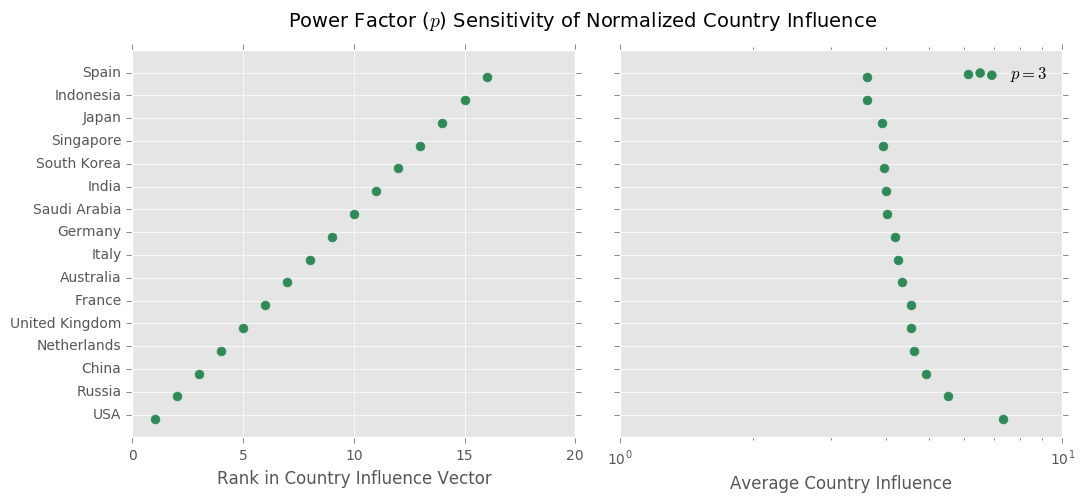

In [ ]:
c=['seaGreen','royalBlue','#dd1c77']
levels=[basepower]
toplot=[cid[i] for i in goodcountries2]
tolabel=[labeler[i] for i in goodcountries2]
fig,ax=plt.subplots(1,2,figsize=(12,5))
for j in range(len(levels)):
    [importancematrix,influencematrix]=dendro(sd,si,levels[j])
    z=[np.mean(i) for i in influencematrix] #sum country influence on columns
    #if you wanted weighted influence, introduce weights (by trade volume i guess) here in the above mean
    s = pd.Series(1/np.array(z)) #need to 1/ to create inverse order
    s=s.rank(method='dense').values.astype(int)-1 #start from 0 not one
    #s is a ranked array on which country ranks where in country influence 
    #we then composed the ordered vector of country influence
    influencevector=[0 for i in range(len(s))]
    for i in range(len(s)):
        influencevector[s[i]]=i
    zplot=[]
    zplot2=[]
    for i in toplot:
        zplot.append(s[i]+1)
        zplot2.append(z[i])
    ax[0].scatter(np.array(zplot),np.arange(len(zplot))-0.2+0.2*j,40,color=c[j],label=u'$p='+str(levels[j])+'$')
    ax[1].scatter(np.array(zplot2),np.arange(len(zplot))-0.2+0.2*j,40,color=c[j],label=u'$p='+str(levels[j])+'$')
    ax[0].set_ylim(-1,len(toplot))
    ax[1].set_ylim(-1,len(toplot))
    ax[0].set_xlim(0,20)
    ax[1].set_xscale('log')
    ax[0].set_yticks(range(len(toplot)))
    ax[0].set_yticklabels(tolabel)
    ax[1].set_yticks(range(len(toplot)))
    ax[1].set_yticklabels([])
    ax[0].set_xlabel("Rank in Country Influence Vector")
    ax[1].set_xlabel("Average Country Influence")
    if levels[j]==basepower:
        civector={}
        for k in range(len(influencevector)):
            civector[k+1]={"inf":np.round(z[influencevector[k]],2),"country":labeler[goodcountries[influencevector[k]]]}
        uk=[]
        for uj in range(len(influencematrix)):
            for ui in range(len(influencematrix[uj])):
                if ui!=uj:
                    uk.append({'type':'Country influence explorer',
                               'country':labeler[goodcountries[uj]],
                               'partner':labeler[goodcountries[ui]],
                               'inf':influencematrix[uj][ui],
                               'imp':importancematrix[uj][ui]})
        #pd.DataFrame(civector).T.to_excel('../json/'+sd+'/'+ni+'_'+inf+'_c.xlsx')
        #file('../json/'+sd+'/'+ni+'_'+inf+'_uk.json','w').write(json.dumps(uk)) 
ax[1].legend(loc=1,framealpha=0)
plt.subplots_adjust(wspace=0.1)
plt.suptitle("Power Factor ($p$) Sensitivity of Normalized Country Influence",fontsize=14)
#plt.savefig('../json/'+sd+'/'+ni+'_'+inf+'_powerfactor.png',dpi=150,bbox_inches = 'tight', pad_inches = 0.1, )
plt.show()

Create energy cost by filling the matrix with the cost of row importing 1TWh from column. neglecting transport energy costs for now, this will be the extraction energy cost. Let us consider only solar for now. Try optimization with all three source, choose one with best objective value. 1TWh tier changes based on granurality.

In [ ]:
#weighted resource class calculator
def re(dic,total):
    if dic!={}:
        i=max(dic.keys())
        mi=min(dic.keys())
        run=True
        keys=[]
        weights=[]
        counter=0
        while run:
            counter+=1 #safety break
            if counter>1000: run=False
            if i in dic:
                if total<dic[i]:
                    keys.append(i)
                    weights.append(total)
                    run=False
                else:
                    total-=dic[i]
                    keys.append(i)
                    weights.append(dic[i])
                    i-=1
            if i<mi: run=False
        if sum(weights)==0: return 0
        else: return np.average(keys,weights=weights)
    else: return 0

In [ ]:
region=pd.read_excel(pop_path+'regions.xlsx').set_index('Country')

In [ ]:
#load
aroei=json.loads(file(pop_path+'aroei.json','r').read())
groei=json.loads(file(pop_path+'groei.json','r').read())
ndists=json.loads(file(pop_path+'ndists.json','r').read())

In [ ]:
#average resource quality calculator for the globe
def update_aroei():
    global aroei
    aroei={}
    groei={}
    for c in res:
        for r in res[c]:
            if r not in groei: groei[r]={}
            for cl in res[c][r]['res']:
                if cl not in groei[r]: groei[r][cl]=0
                groei[r][cl]+=res[c][r]['res'][cl]
    for r in groei:
        x=[]
        y=[]
        for i in range(len(sorted(groei[r].keys()))):
            x.append(float(sorted(groei[r].keys())[i]))
            y.append(float(groei[r][sorted(groei[r].keys())[i]]))
        aroei[r]=np.average(x,weights=y)

In [ ]:
#https://www.researchgate.net/publication/299824220_First_Insights_on_the_Role_of_solar_PV_in_a_100_Renewable_Energy_Environment_based_on_hourly_Modeling_for_all_Regions_globally
cost=pd.read_excel(pop_path+'/maps/storage.xlsx')

In [ ]:
#1Bdi - grid
def normdistance(a,b):
    return ndists[cid[a]][cid[b]]
def gridtestimator(country,partner,forceptl=False):
    #return normdistance(country,partner)
    def electricitytrade(country,partner):
        scaler=1
        gridpartners=grid5['electricity']
        #existing trade partners
        if ((partner in gridpartners[country]) or (country in gridpartners[partner])): 
            scaler+=cost.loc[region.loc[country]]['egrid'].values[0]/2.0
        #neighbors, but need to build
        elif pop2iso[country] in c2neighbors:
            if (pop2iso[partner] in c2neighbors[pop2iso[country]]):
                scaler+=cost.loc[region.loc[country]]['grid'].values[0]/2.0*normdistance(country,partner)
            #not neighbors or partners but in the same region, need to build
            elif (region.loc[country][0]==region.loc[partner][0]):
                scaler+=cost.loc[region.loc[country]]['grid'].values[0]*3.0/2.0*normdistance(country,partner)
            #need to build supergrid, superlative costs
            else: 
                scaler+=cost.loc[region.loc[country]]['grid'].values[0]*10.0/2.0*normdistance(country,partner)
        #need to build supergrid, superlative costs
        else: 
                scaler+=cost.loc[region.loc[country]]['grid'].values[0]*10.0/2.0*normdistance(country,partner)
        return scaler
    
    def ptltrade(country,partner):
        #ptg costs scale with distance
        scaler=1+cost.loc[11]['ptg']*100.0*normdistance(country,partner) 
        return scaler
    
    if ptltrade(country,partner)<electricitytrade(country,partner) or forceptl:
        return {"scaler":ptltrade(country,partner),"tradeway":"ptl"}
    else: return {"scaler":electricitytrade(country,partner),"tradeway":"grid"}

In [ ]:
#1Bdii - storage &curtailment
def storagestimator(country):
    return cost.loc[region.loc[country]]['min'].values[0]
    #curtoversizer
def curtestimator(country):
    return cost.loc[region.loc[country]]['curt'].values[0]

In [ ]:
#global benchmark eroei, due to state of technology
eroei={
#'oil':13,
#'coal':27,
#'gas':14,
#'nuclear':10,
#'biofuels':1.5,
#'hydro':84,
#'geo_other':22,
'pv':13.74,#17.6,
'csp':7.31,#10.2,
'wind':11.17,#20.2 #24
}
eroei={
'pv':14,#17.6,
'csp':9,#10.2,
'wind':14,#20.2 #24
}
#without esoei
#calibrated from global, from Table S1 in ERL paper

# ALLINONE

In [ ]:
#initialize renewable totals for learning
total2014={'csp':0,'solar':0,'wind':0}
learning={'csp':0.04,'solar':0.04,'wind':0.02}
year=2014
for fuel in total2014:
    total2014[fuel]=np.nansum([np.nansum(data[partner][year]['energy'][fuel]['cons']['navg3'])\
                           for partner in goodcountries if fuel in data[partner][year]['energy']])

In [ ]:
total2014

{'csp': 10.149336, 'solar': 175.21729730219911, 'wind': 708.69708299090462}

In [ ]:
#scenario id (folder id) 
#first is scenario family, then do 4 variations of scenarios (2 selfinluence, 2 power factor) as 01, 02...

#import resources

###################################
###################################
#load resources
#predata=json.loads(file(pop_path+'maps/newres.json','r').read())
predata=json.loads(file(pop_path+'maps/res.json','r').read())
res={}
for c in predata:
    res[c]={}
    for f in predata[c]:
        res[c][f]={}
        for r in predata[c][f]:
            res[c][f][r]={}
            for year in predata[c][f][r]:
                res[c][f][r][int(year)]=predata[c][f][r][year]
predata={}
print 'scenario',sd,'loaded resources',
###################################
###################################
#load demand2
predata=json.loads(file(pop_path+'demand2.json','r').read())
demand2={}
for c in predata:
    demand2[c]={}
    for year in predata[c]:
        demand2[c][int(year)]=predata[c][year]
predata={}
print 'demand',
###################################
###################################
#load tradealpha d
#predata=json.loads(file(pop_path+'/trade/traded.json','r').read())
predata=json.loads(file(pop_path+'/trade/smalltrade.json','r').read())
tradealpha={}
for c in predata:
    tradealpha[c]={}
    for year in predata[c]:
        tradealpha[c][int(year)]=predata[c][year]
predata={}
print 'tradedata',
###################################
###################################
#reload impex and normalize
predata=json.loads(file(pop_path+'trade/nimpex.json','r').read())
nexportmatrix=predata["nexport"]
nimportmatrix=predata["nimport"]
nrexportmatrix=predata["nrexport"]
nrimportmatrix=predata["nrimport"]
predata={}
print 'impex',
###################################
###################################
#load latest savedata
#we dont change the data for now, everything is handled through trade
predata=json.loads(file(pop_path+'savedata6.json','r').read())
data={}
for c in predata:
    data[c]={}
    for year in predata[c]:
        data[c][int(year)]=predata[c][year]
predata={}
print 'data'
###################################
###################################

scenario s3 loaded resources demand tradedata impex data


In [ ]:
#reset balance
ybalance={}
#recalculate balances
for year in range(2015,2101):
    balance={}
    if year not in ybalance:ybalance[year]={}
    for c in goodcountries:
        balance[c]=0
        if c in tradealpha:
            f1=0
            for fuel in tradealpha[c][year]:
                if 'Import' in tradealpha[c][year][fuel]: 
                    f1=np.nansum([f1,sum(tradealpha[c][year][fuel]['Import'].values())])
                if 'Re-Import' in tradealpha[c][year][fuel]: 
                    f1=np.nansum([f1,sum(tradealpha[c][year][fuel]['Re-Import'].values())])
                if 'Export' in tradealpha[c][year][fuel]: 
                    f1=np.nansum([f1,-sum(tradealpha[c][year][fuel]['Export'].values())])
                if 'Re-Export' in tradealpha[c][year][fuel]: 
                    f1=np.nansum([f1,-sum(tradealpha[c][year][fuel]['Re-Export'].values())])
                if fuel in data[c][year]['energy']:
                    f1=np.nansum([f1,data[c][year]['energy'][fuel]['prod']['navg3']])
            balance[c]-=f1
        balance[c]+=demand2[c][year]*8760*1e-12
        if 'balance' not in data[c][year]['energy']:
            data[c][year]['energy']['balance']={'prod':{'navg3':0},'cons':{'navg3':0}}
        data[c][year]['energy']['balance']['prod']['navg3']=max(0,balance[c])#balance can't be negative
        data[c][year]['energy']['balance']['cons']['navg3']=max(0,balance[c])
    ybalance[year]=balance
#save3('0a') #save default

In [ ]:
def cbalance(year,c):
    balance=0
    if c in tradealpha:
        f1=0
        for fuel in tradealpha[c][year]:
            if 'Import' in tradealpha[c][year][fuel]: 
                f1=np.nansum([f1,sum(tradealpha[c][year][fuel]['Import'].values())])
            if 'Re-Import' in tradealpha[c][year][fuel]: 
                f1=np.nansum([f1,sum(tradealpha[c][year][fuel]['Re-Import'].values())])
            if 'Export' in tradealpha[c][year][fuel]: 
                f1=np.nansum([f1,-sum(tradealpha[c][year][fuel]['Export'].values())])
            if 'Re-Export' in tradealpha[c][year][fuel]: 
                f1=np.nansum([f1,-sum(tradealpha[c][year][fuel]['Re-Export'].values())])
            if '_' in fuel:
                fuel=fuel[fuel.find('_')+1:]
            #if fuel in data[c][year]['energy']:
            #    f1=np.nansum([f1,data[c][year]['energy'][fuel]['prod']['navg3']])
        for fuel in data[c][year]['energy']:
            if fuel not in {"nrg_sum","nrg"}:
                f1=np.nansum([f1,data[c][year]['energy'][fuel]['prod']['navg3']])
        balance-=f1
    balance+=demand2[c][year]*8760*1e-12
    return balance

In [ ]:
def res_adv(country,fuel): #this country's wavg resource compared to global
    x=[]
    y=[]    
    if fuel=='solar':fuel='pv'
    d=groei[fuel] #global wavg resource class 
    for i in range(len(sorted(d.keys()))):
        if float(d[sorted(d.keys())[i]])>0.1:
            x.append(float(sorted(d.keys())[i]))
            y.append(float(d[sorted(d.keys())[i]]))
    x2=[]
    y2=[]   
    if country not in res: return 0
    d2=res[country][fuel]['res'] #country's wavg resource class
    for i in range(len(sorted(d2.keys()))):
        if float(d2[sorted(d2.keys())[i]])>0.1:
            x2.append(float(sorted(d2.keys())[i]))
            y2.append(float(d2[sorted(d2.keys())[i]]))
            
    if y2!=[]: return np.average(x2,weights=y2)*1.0/np.average(x,weights=y)
    else: return 0

In [ ]:
def costvectorranker(cv):
    k={}
    for i in cv:
        for j in cv[i]:
            k[(i)+'_'+str(j)]=cv[i][j]
    return sorted(k.items(), key=lambda value: value[1])

In [ ]:
def trade(country,partner,y0,fuel,value,l0):
    lifetime=l0+int(random.random()*l0)
    tradeable[partner][fuel]-=value 
    key=tradeway[country][partner]+'_'+fuel
    for year in range(y0,min(2101,y0+lifetime)):
        #add production
        if fuel not in data[partner][year]['energy']:
            data[partner][year]['energy'][fuel]={'prod':{'navg3':0},'cons':{'navg3':0}}
        data[partner][year]['energy'][fuel]['prod']['navg3']+=value
        data[partner][year]['energy']['nrg_sum']['prod']['navg3']+=value
        #add consumption
        if fuel not in data[country][year]['energy']:
            data[country][year]['energy'][fuel]={'prod':{'navg3':0},'cons':{'navg3':0}}
        data[country][year]['energy'][fuel]['cons']['navg3']+=value
        data[country][year]['energy']['nrg_sum']['cons']['navg3']+=value
        #add storage on country side (if not ptl)
        if tradeway[country][partner]=='grid':
            if fuel not in {'csp'}:
                if 'storage' not in data[country][year]['energy']:
                    data[country][year]['energy']['storage']={'prod':{'navg3':0},'cons':{'navg3':0}}
                data[country][year]['energy']['storage']['prod']['navg3']+=value*storagestimator(country)
                data[country][year]['energy']['storage']['cons']['navg3']+=value*storagestimator(country)
        if country!=partner:
            #add import flow
            if key not in tradealpha[country][year]:tradealpha[country][year][key]={}
            if 'Import' not in tradealpha[country][year][key]:tradealpha[country][year][key]["Import"]={}
            if str(pop2iso[partner]) not in tradealpha[country][year][key]["Import"]:
                tradealpha[country][year][key]["Import"][str(pop2iso[partner])]=0
            tradealpha[country][year][key]["Import"][str(pop2iso[partner])]+=value
            #add export flow
            if key not in tradealpha[partner][year]:tradealpha[partner][year][key]={}
            if 'Export' not in tradealpha[partner][year][key]:tradealpha[partner][year][key]["Export"]={}
            if str(pop2iso[country]) not in tradealpha[partner][year][key]["Export"]:
                tradealpha[partner][year][key]["Export"][str(pop2iso[country])]=0
            tradealpha[partner][year][key]["Export"][str(pop2iso[country])]+=value

In [ ]:
#trade diversificatioin necessity
def divfill(cv,divfactor,divbalance):
    scaler=min(1.0,divbalance/\
            sum([tradeable[cv[i][0][:cv[i][0].find('_')]]\
                 [cv[i][0][cv[i][0].find('_')+1:]] for i in range(divfactor)])) #take all or partial
    for i in range(divfactor):
        partner=cv[i][0][:cv[i][0].find('_')]
        fuel=cv[i][0][cv[i][0].find('_')+1:]
        trade(country,partner,year,fuel,max(0,tradeable[partner][fuel])*scaler,lifetime)

In [ ]:
def tradefill(cv):
    totrade=[]
    tradesum=0
    #
    #for i in range(len(cv)):
    #ASSYMETRIC TRADE PARTNER PICKING OUT OF TOP 5
    k=[kk for kk in cv]
    for ii in range(len(cv)):
        z=min(len(k)-1,int(np.random.exponential(100)/100.0))
        i=k[z]
        k=k[:z]+k[z+1:]
        ####SAME FROM HERE
        partner=i[0][:i[0].find('_')]
        fuel=i[0][i[0].find('_')+1:]
        if tradeable[partner][fuel]>balance-tradesum:
            totrade.append((i[0],balance-tradesum))
            tradesum+=balance-tradesum
            break
        else:
            totrade.append((i[0],tradeable[partner][fuel]))
            tradesum+=tradeable[partner][fuel]
            
    for i in totrade:
        partner=i[0][:i[0].find('_')]
        fuel=i[0][i[0].find('_')+1:]
        trade(country,partner,year,fuel,i[1],lifetime)

In [ ]:
def omegafill(cv):
    global wasalready
    totrade=[]
    tradesum=0
    for i in range(len(cv)):
        partner=cv[i][0][:cv[i][0].find('_')]
        fuel=cv[i][0][cv[i][0].find('_')+1:]
        if country==partner:
            if fuel not in wasalready:
                wasalready.add(fuel)
                if tradeable[partner][fuel]>balance-tradesum:
                    totrade.append((cv[i][0],balance-tradesum))
                    tradesum+=balance-tradesum
                    break
                else:
                    totrade.append((cv[i][0],tradeable[partner][fuel]))
                    tradesum+=tradeable[partner][fuel]
                #trade(country,partner,year,fuel,min(cv[i][1],tradeable[partner][fuel]),lifetime)
    for i in totrade:
        partner=i[0][:i[0].find('_')]
        fuel=i[0][i[0].find('_')+1:]
        trade(country,partner,year,fuel,i[1],lifetime)

In [ ]:
def nrgsum(country,year):
    return np.nansum([data[country][year]['energy'][i]['prod']['navg3'] for i in data[country][year]['energy'] if i not in ['nrg_sum','sum','nrg']])

In [ ]:
def liquidcheck(year,country):
    oil=data[country][year]['energy']['oil']['prod']['navg3']
    gas=data[country][year]['energy']['gas']['prod']['navg3']
    try: ptl=sum([sum(tradealpha[country][year][i]['Import'].values()) for i in tradealpha[country][year] if 'ptl' in i])
    except: ptl=0
    liquidshare=(oil+gas+ptl)/nrgsum(country,year)
    return max(0,(h2[country]-liquidshare)*nrgsum(country,year)) #return amount to fill with liquids

def liquidfill(country,year):
    toadjust=0
    tofill=liquidcheck(year,country)
    adjustable={}
    if tofill>0:
        for fuel in data[country][year]['energy']:
            if fuel not in {"nrg","nrg_sum","storage","oil","gas"}:
                if data[country][year]['energy'][fuel]['prod']['navg3']>0:
                    if not np.isnan(data[country][year]['energy'][fuel]['prod']['navg3']):
                        toadjust+=data[country][year]['energy'][fuel]['prod']['navg3']
        for fuel in tradealpha[country][year]:
            if fuel not in {"coal","oil","gas"}:
                if 'ptl' not in fuel:
                    if 'Import' in tradealpha[country][year][fuel]:
                        toadjust+=np.nansum(tradealpha[country][year][fuel]["Import"].values())
        #scan fuels to adjust, calculate adjust scaler
        adjustscaler=1.0-tofill*1.0/toadjust
        
        #scale down fuels, record what to put back as ptl
        for fuel in data[country][year]['energy']:
            if fuel not in {"nrg","nrg_sum","storage","oil","gas"}:
                if data[country][year]['energy'][fuel]['prod']['navg3']>0:
                    if not np.isnan(data[country][year]['energy'][fuel]['prod']['navg3']):
                        data[country][year]['energy'][fuel]['prod']['navg3']*=adjustscaler
                        if fuel not in adjustable: adjustable[fuel]={}
                        adjustable[fuel][pop2iso[country]]=data[country][year]['energy'][fuel]['prod']['navg3']*(1-adjustscaler)
        for fuel in tradealpha[country][year]:
            if fuel not in {"coal","oil","gas"}:
                if 'ptl' not in fuel:
                    if 'Import' in tradealpha[country][year][fuel]:
                        for p in tradealpha[country][year][fuel]["Import"]:
                            tradealpha[country][year][fuel]["Import"][p]*=adjustscaler
                            if fuel[fuel.find('_')+1:] not in adjustable: adjustable[fuel[fuel.find('_')+1:]]={}
                            adjustable[fuel[fuel.find('_')+1:]][p]=tradealpha[country][year][fuel]["Import"][p]*(1-adjustscaler)

    #put back ptl
    for fuel in adjustable:
        for p in adjustable[fuel]:
            if 'ptl_'+str(fuel) not in tradealpha[country][year]:
                tradealpha[country][year]['ptl_'+str(fuel)]={}
            if 'Import' not in tradealpha[country][year]['ptl_'+str(fuel)]:
                tradealpha[country][year]['ptl_'+str(fuel)]["Import"]={}
            tradealpha[country][year]['ptl_'+str(fuel)]["Import"][p]=adjustable[fuel][p]                

In [ ]:
#scenario id (folder id) 
#first is scenario family, then do 4 variations of scenarios (2 selfinluence, 2 power factor) as 01, 02...

#import resources

###################################
###################################
#load resources
#predata=json.loads(file(pop_path+'maps/newres.json','r').read())
predata=json.loads(file(pop_path+'maps/res.json','r').read())
res={}
for c in predata:
    res[c]={}
    for f in predata[c]:
        res[c][f]={}
        for r in predata[c][f]:
            res[c][f][r]={}
            for year in predata[c][f][r]:
                res[c][f][r][int(year)]=predata[c][f][r][year]
predata={}
print 'scenario',sd,'loaded resources',
###################################
###################################
#load demand2
predata=json.loads(file(pop_path+'demand2.json','r').read())
demand2={}
for c in predata:
    demand2[c]={}
    for year in predata[c]:
        demand2[c][int(year)]=predata[c][year]
predata={}
print 'demand',
###################################
###################################
#load tradealpha d
#predata=json.loads(file(pop_path+'/trade/traded.json','r').read())
predata=json.loads(file(pop_path+'/trade/smalltrade.json','r').read())
tradealpha={}
for c in predata:
    tradealpha[c]={}
    for year in predata[c]:
        tradealpha[c][int(year)]=predata[c][year]
predata={}
print 'tradedata',
###################################
###################################
#reload impex and normalize
predata=json.loads(file(pop_path+'trade/'+ni+'.json','r').read())
nexportmatrix=predata["nexport"]
nimportmatrix=predata["nimport"]
nrexportmatrix=predata["nrexport"]
nrimportmatrix=predata["nrimport"]
predata={}
print ni,
###################################
###################################
#load latest savedata
#we dont change the data for now, everything is handled through trade
predata=json.loads(file(pop_path+'savedata6.json','r').read())
data={}
for c in predata:
    data[c]={}
    for year in predata[c]:
        data[c][int(year)]=predata[c][year]
predata={}
print 'data'
###################################
###################################

scenario s3 loaded resources demand tradedata impex data


In [ ]:
[importancematrix,influencematrix]=dendro(sd,si,basepower) #2,5, or 4,3
z=[np.mean(i) for i in influencematrix] #sum country influence on columns
#if you wanted weighted influence, introduce weights (by trade volume i guess) here in the above mean
s = pd.Series(1/np.array(z)) #need to 1/ to create inverse order
s=s.rank(method='dense').values.astype(int)-1 #start from 0 not one
#s is a ranked array on which country ranks where in country influence 
#we then composed the ordered vector of country influence
influencevector=[0 for i in range(len(s))]
for i in range(len(s)):
    influencevector[s[i]]=i

In [84]:
CV={}
CV2={}
TB={}

In [ ]:
fc={"solar":'pv',"csp":'csp',"wind":'wind'}
divfactor=10 #min trade partners in trade diversification
divshare=0.2 #min share of the trade diversification, total
tradeway={}
lifetime=20 #base lifetime
maxrut=0.01 #for each type #max rampup total, if zero 5% of 1% 0.05 / 0.001
maxrur=1.5 #growth rate for each techno #max rampup rate 0.5
omegamin=0.1 #min share of the in-country diversification, per fuel
random.seed(2)
cs=set()

for year in range(2025,2101):
    tradeable={}
    if year not in TB:TB[year]={}
    for i in range(len(goodcountries)):
        country=goodcountries[i]
        if country not in tradeable:tradeable[country]={'solar':0,'csp':0,'wind':0}
        for fuel in {"solar","csp","wind"}:
            if fuel not in data[country][year-1]['energy']:
                tradeable[country][fuel]=nrgsum(country,year-1)*maxrut
            elif data[country][year-1]['energy'][fuel]['prod']['navg3']==0:
                tradeable[country][fuel]=nrgsum(country,year-1)*maxrut
            else: tradeable[country][fuel]=max(nrgsum(country,year-1)*maxrut,
                                               data[country][year-1]['energy'][fuel]['prod']['navg3']*maxrur)
    for i in range(len(influencevector))[:]:#4344  
        country=goodcountries[influencevector[i]]
        cs.add(country)
        #if year==2015:
        if True:
            costvector={}
            for j in range(len(goodcountries)):
                partner=goodcountries[j]
                if partner not in costvector:costvector[partner]={}
                transactioncost=gridtestimator(country,partner)
                if country not in tradeway:tradeway[country]={}
                if partner not in tradeway[country]:tradeway[country][partner]=transactioncost["tradeway"]
                for fuel in {"solar","csp","wind"}:
                    ru0=0
                    if fuel not in data[partner][year]['energy']: ru = ru0
                    elif partner not in res: ru = ru0
                    elif sum(res[partner][fc[fuel]]['res'].values())==0: ru=1
                    elif data[partner][year]['energy'][fuel]['prod']['navg3']==0: ru=ru0
                    else: ru=data[partner][year]['energy'][fuel]['prod']['navg3']*1.0/\
                                        sum(res[partner][fc[fuel]]['res'].values())
                    ru=max(ru,0)
                    ru=max(1,0.3+ru**0.1) #or 0.3
                    costvector[partner][fuel]=1.0/influencematrix[influencevector[i]][j]*\
                                        transactioncost['scaler']*\
                                        ru*\
                                        1.0/(eroei[fc[fuel]]*1.0/np.mean(eroei.values())*\
                                             res_adv(partner,fuel)*\
                                             aroei[fc[fuel]]*1.0/np.mean(aroei.values()))
            cv=costvectorranker(costvector)
        #fulfill trade diversification criterion
        balance=divshare*cbalance(year,country)
        if balance>0:
            divfill(cv,divfactor,balance)
        #fulfill in-country diversification criterion
        wasalready=set()
        balance=cbalance(year,country)*omegamin
        if balance>0:
            omegafill(cv) #fill first best source to min share
            omegafill(cv) #fill second best source to min share
        #fill up rest of trade
        balance=cbalance(year,country)
        if balance>0:
            tradefill(cv)
        #fill liquids up to min liquid level
        liquidfill(country,year)
        print i,
        #CV2[country]=cv
    print year
save3(sd,cs)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 2025
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

Exception KeyboardInterrupt in 'zmq.backend.cython.message.Frame.__dealloc__' ignored


KeyboardInterrupt: 

In [ ]:
file('E:/Dropbox/Public/datarepo/netset/savedata/'+sd+'data.json','w').write(json.dumps(data)) 
file('E:/Dropbox/Public/datarepo/netset/savedata/'+sd+'trade.json','w').write(json.dumps(tradealpha)) 